In [29]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

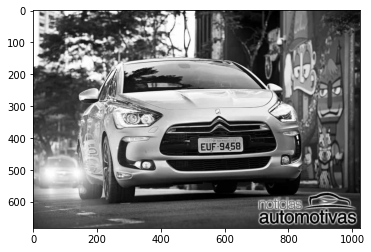

In [30]:
img = cv2.imread("image4.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

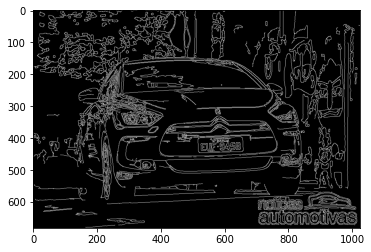

In [31]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [32]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key=cv2.contourArea, reverse=True)[:10]

In [33]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [34]:
location

array([[[656, 401]],

       [[519, 400]],

       [[517, 440]],

       [[655, 442]]], dtype=int32)

In [35]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

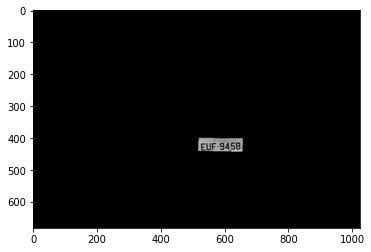

In [36]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [37]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

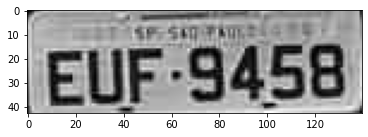

In [38]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [39]:
reader = easyocr.Reader(['pt'])
result = reader.readtext(cropped_image)
result

[([[0, 9], [139, 9], [139, 43], [0, 43]], 'EVF 9458', 0.9244821186156931)]

In [40]:
try:
    text = result[1][-2]
except IndexError:
    text = result[0][-2]
text

'EVF 9458'

In [1]:
characters = "."
for i in range(len(characters)):
    text = text.replace(characters[i], "")
text

NameError: name 'text' is not defined

'EVF 9458'

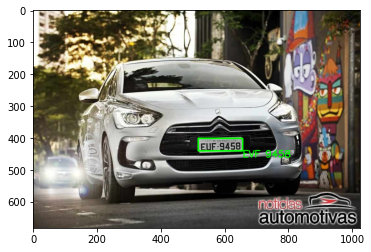

In [42]:
# text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
text

In [44]:
import csv
bd = csv.reader(open(r'C:/Users/danrl/Desktop/Python/placas-cadastradas.csv'),delimiter=';') #Banco de dados com as placas registradas.
placas = []
cor = []
modelo = []
resultado = ''
for linha in bd:
    modelo.append(linha[1])
    placas.append(linha[0])
    cor.append(linha[3])

for i in range(len(cor)):
    if placas[i] == text:
        resultado = 'Veículo modelo {} na cor {} de placa {} está autorizado para entrar!'.format(modelo[i],cor[i],placas[i])
    else:
        resultado = 'Acesso negado. Veículo de placa {} não tem acesso ou não está cadastrado.'.format(text)

resultado

'Acesso negado. Veículo de placa EVF 9458 não tem acesso ou não está cadastrado.'